# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
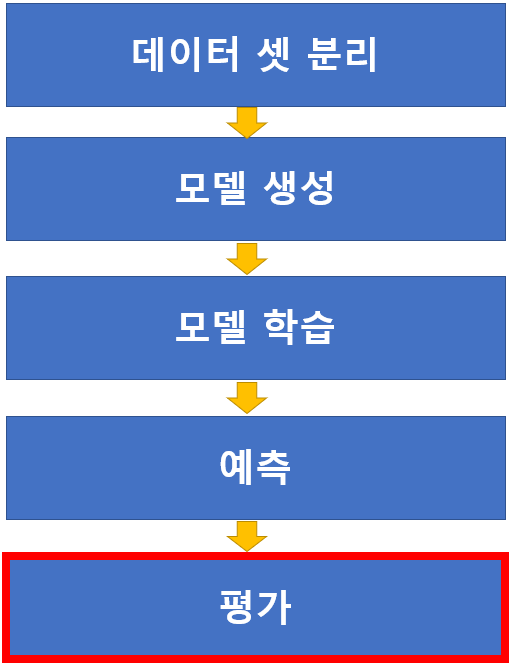

## 분류와 회귀의 평가방법
### 분류 평가 지표 : 범주형 평가
1. 정확도 (Accuracy) : 0,1 둘다 봄. 전체적으로 잘 맞았는지 봄.
1. 정밀도 (Precision) : 하나에 대한 것만 봄.(보통1을 봄). 이 하나가 얼마나 잘 맞았는지 봄.
1. 재현률 (Recall) : 하나에 대한 것만 봄.(보통1을 봄). 이 하나가 얼마나 잘 맞았는지 봄.
1. F1점수 (F1 Score)
1. PR Curve, AP
1. ROC, AUC

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 기준
## 용어
- ### 이진 분류에서 양성과 음성
    - 양성(Positive): 예측하려는(찾으려는) 대상
    - 음성(Negative): 예측하려는 대상이 아닌 것
    - 예
        - 암환자 분류 : 양성 - 암 환자, 음성 - 정상인
        - 스팸메일 분류 : 양성 - 스팸메일, 음성 - 정상메일
        - 금융사기 모델: 양성 - 사기거래, 음성 - 정상거래
        
## 정확도 (Accuracy)

$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.


## MNIST Data set
- 손글씨 데이터 셋
- 사이킷런 제공 image size: 8 X 8 
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
mnist.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [4]:
X = mnist['data']
y = mnist['target']
X.shape, y.shape

((1797, 64), (1797,))

In [5]:
# y 빈도수
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [6]:
X[0] #첫번째 그림
# 1차원 배열->2차원 배열 (height, width)
X[1].reshape(8,8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

8


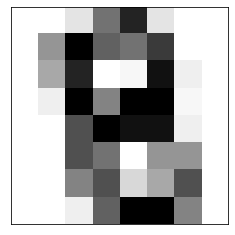

In [7]:
print(y[500])
img = X[500].reshape(8,8)
# plt.imshow(img, cmap='gray')  #ndarray를 넣어주면 image 로 보여주는 함수
plt.imshow(img, cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [8]:
y = np.where(y == 9, 1, 0) #True: 1, False: 0

In [9]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1617,  180], dtype=int64))

### 훈련, 테스트 데이터셋 분할

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

### 모델 생성 및 학습

#### Dummy Model 정의
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# 무조건 최빈값으로 예측하는 dummy 모델 생성
dummy_model = DummyClassifier(strategy='most_frequent')
# 학습
dummy_model.fit(X_train, y_train)
# 추론 + 평가
pred_train = dummy_model.predict(X_train)
pred_test = dummy_model.predict(X_test)

# 정확도
print('train 정확도:{}, test 정확도: {}'.format(accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)))

train 정확도:0.8997772828507795, test 정확도: 0.9


In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1212,  135], dtype=int64))

In [14]:
np.unique(pred_train), np.unique(pred_test)

(array([0]), array([0]))

In [15]:
from sklearn.metrics import confusion_matrix
print("train 혼동 행렬")
confusion_matrix(y_train, pred_train)

train 혼동 행렬


array([[1212,    0],
       [ 135,    0]], dtype=int64)

In [16]:
print('test 혼동 행렬')
confusion_matrix(y_test, pred_test)

test 혼동 행렬


array([[405,   0],
       [ 45,   0]], dtype=int64)

## 혼동 행렬(Confusion Marix)
- 분류의 평가지표의 기준으로 사용된다.
- 혼동행렬을 이용해 다양한 평가지표(정확도, 재현률, 정밀도, F1 점수, AUC 점수)를 계산할 수 있다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

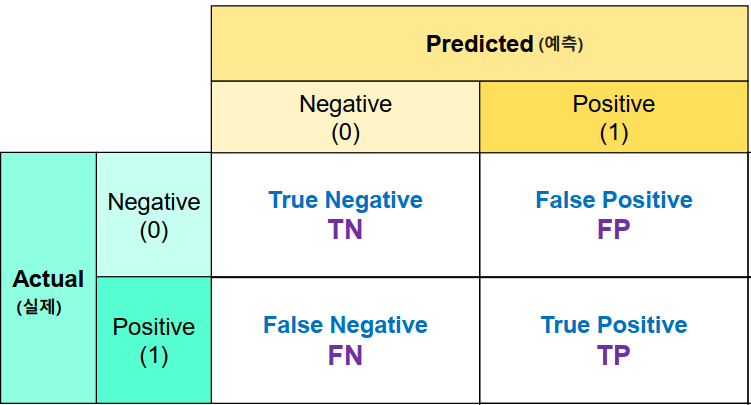

![img](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

- TP(True Positive) - 양성으로 예측했는데 맞은 개수
- TN(True Negative) - 음성으로 예측했는데 맞은 개수
- FP(False Positive) - 양성으로 예측했는데 틀린 개수 (음성을 양성으로 예측)
- FN(False Negative) - 음성으로 예측했는데 틀린 개수 (양성을 음성으로 예측)

## 이진 분류 평가점수
- ### Accuracy (정확도) 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- ### Recall/Sensitivity(재현율/민감도) 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- ### Precision(정밀도) 
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- ### F1 점수
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.
    
### 기타
- ### Specificity(특이도)
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - TNR(True Negative Rate) 라고도 한다.
- ### Fall out(위양성률)
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $ Fall-Out(FPF) = \cfrac{FP}{TN+FP}$

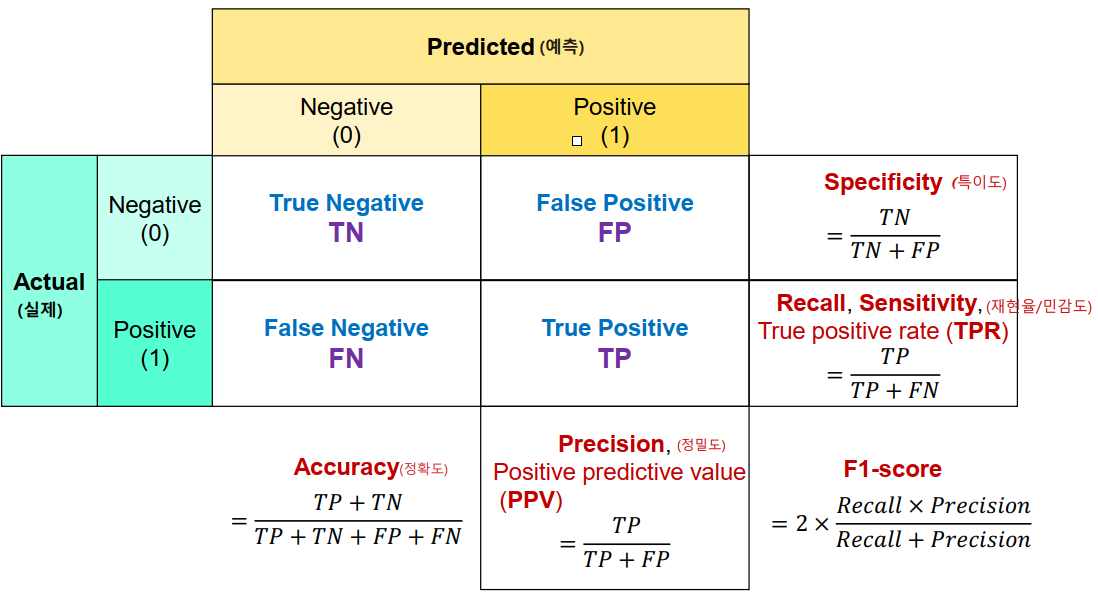

fn : negative라고 예측했는데 틀린거

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- ### confusion_matrix(y 실제값, y 예측값)
    - 혼돈 행렬 반환
- ### recall_score(y 실제값, y 예측값) 
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- ### precision_score(y 실제값, y 예측값)
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- ### f1_score(y 실제값, y 예측값)
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- ### classification_report(y 실제값, y 예측값)    
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬
> plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 `pip install scikit-learn --upgrade`

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix

In [18]:
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train))
print("="*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test))

Train confusion matrix
[[1212    0]
 [ 135    0]]
Test confusion matrix
[[405   0]
 [ 45   0]]


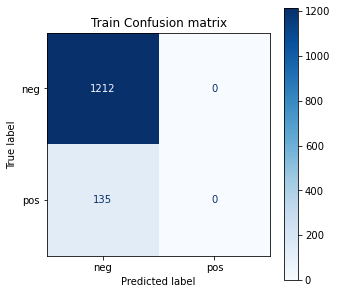

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(5,5))    # ax=plt.gca()
plot_confusion_matrix(dummy_model,    # 학습한 모델
                     X_train,    # 예측할 X, 모델.predict(X_train))
                      y_train,    # 정답 y. 예측한 값과 비교할 정답 y"
                      display_labels=['neg','pos'],
                      values_format='d',
                      cmap='Blues',
                      ax=ax)    # axes(그래프를 그릴 axes)
plt.title('Train Confusion matrix')
plt.show()

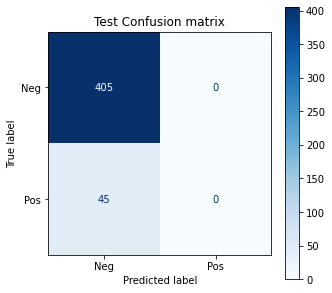

In [20]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_confusion_matrix(dummy_model,
                     X_test,
                     y_test,
                     display_labels=['Neg','Pos'],
                     values_format='d',
                     cmap='Blues',
                     ax=ax)
plt.title('Test Confusion matrix')
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [21]:
# accuracy_score
acc_train  = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print(acc_train, acc_test)

0.8997772828507795 0.9


In [22]:
# recall score
recall_train = recall_score(y_train, pred_train)
recall_test = recall_score(y_test, pred_test)
print(recall_train, recall_test)
# 0.0 : 실제 양성(9인 것)중에서 하나도 못맞춤.

0.0 0.0


In [23]:
# precision score
precision_train = precision_score(y_train, pred_train)
precision_test = precision_score(y_test, pred_test)
precision_train, precision_test
# (0.0, 0.0) : 양성으로 예측한 것 중에 하나도 못맞춤

C:\Users\Playdata\anaconda3\envs\jcryml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\anaconda3\envs\jcryml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [24]:
# f1 score (recall과 precision의 조화평균)
f1_train = f1_score(y_train, pred_train)
f1_test = f1_score(y_test, pred_test)
print(recall_train, recall_test)

0.0 0.0


In [25]:
from sklearn.metrics import classification_report

In [26]:
# accuracy : 정확도
report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



C:\Users\Playdata\anaconda3\envs\jcryml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\anaconda3\envs\jcryml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\anaconda3\envs\jcryml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 머신러닝 모델을 이용해 학습

In [27]:
# DecisionTreeClassifier (max_depth=3)
# 모델 생성
# 학습(train)
# 검증(train/test) - confusion matrix, accuracy, recall, precision, f1

In [28]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [29]:
from sklearn.tree import DecisionTreeClassifier\
# DecisionTreeClassifier 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
# Train
tree.fit(X_train, y_train)

# 평가
# 예측
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)
# 평가

In [30]:
# confusion_matrix
confusion_matrix(y_train, pred_train)

array([[1167,   45],
       [  27,  108]], dtype=int64)

In [31]:
# plt.figure(1,1,figsize=(7,7))
plot_confusion_matrix(tree, X_train,  y_train, display_labels=['Not 9-Neg', cmap='Blues'])#, ax=ax)
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_3416/2932845281.py, line 2)

In [32]:
confusion_matrix(y_test, pred_test)

array([[394,  11],
       [ 11,  34]], dtype=int64)

In [33]:
print('Train 평가지표')
accuracy_score(y_train, pred_train), recall_score(y_train, pred_train), precision_score(y_train, pred_train), f1_score(y_train, pred_train)

Train 평가지표


(0.9465478841870824, 0.8, 0.7058823529411765, 0.7500000000000001)

In [34]:
print("Test 평가지표")
accuracy_score(y_test, pred_test), recall_score(y_test, pred_test), precision_score(y_test, pred_test), f1_score(y_test, pred_test)

Test 평가지표


(0.9511111111111111,
 0.7555555555555555,
 0.7555555555555555,
 0.7555555555555555)

### classification_report()


In [35]:
train_report = classification_report(y_train, pred_train)
print("train 평가지표")
print(train_report)

train 평가지표
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1212
           1       0.71      0.80      0.75       135

    accuracy                           0.95      1347
   macro avg       0.84      0.88      0.86      1347
weighted avg       0.95      0.95      0.95      1347



In [36]:
test_report = classification_report(y_test, pred_test)
print("test 평가지표")
print(test_report)

test 평가지표
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       405
           1       0.76      0.76      0.76        45

    accuracy                           0.95       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.95      0.95      0.95       450



In [37]:
X_test.shape

(450, 64)

In [38]:
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

#### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

#### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정


## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- 임계값 : 모델이 분류의 답을 결정할 때 기준값
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다. (ex: 암환자 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 암환자로 예측하게 된다.)
    
### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 음의 상관관계를 가진다.**
- 임계값을 변화시켰을때 재현율과 위양성율(Fall-Out/FPR)은 양의 상관관계를 가진다.


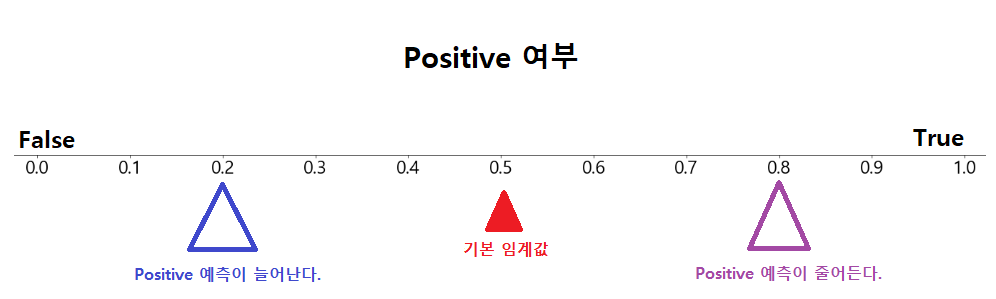

False쪽 : 1일 확률

### 임계값 변화에 따른 recall, precision 변화

In [39]:
X_test.shape

(450, 64)

In [40]:
# model.predict(X) : 분류->최종 class에 대한 추론 결과
# model.predict_proba(X) : 추론 확률. [0일 확률, 1일 확률]
pred_test = tree.predict(X_test)
print(pred_test.shape)
pred_test[-5:]

(450,)


array([1, 0, 0, 0, 0])

In [41]:
prob_test = tree.predict_proba(X_test)
print(prob_test.shape)
prob_test[-5:]

(450, 2)


array([[0.45454545, 0.54545455],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

In [42]:
import pandas as pd
import numpy as np

# 임계값을 변화시켰을 때 recall과 precision의 변화를 확인하는 지표
from sklearn.metrics import precision_recall_curve

In [43]:
precisions, recalls, thresholds = precision_recall_curve(y_test, prob_test[:,1])# (y 정답, 1일 확률 )
precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [44]:
print(thresholds)
print(precisions)
print(recalls)

[0.00826446 0.01304348 0.03389831 0.04       0.14925373 0.54545455
 0.75      ]
[0.1        0.10757946 0.43181818 0.51388889 0.56060606 0.75555556
 0.82352941 1.        ]
[1.         0.97777778 0.84444444 0.82222222 0.82222222 0.75555556
 0.62222222 0.        ]


In [45]:
# thresholds에 1을 추가
thresholds = np.append(thresholds, 1)

In [46]:
thresholds.shape

(8,)

In [47]:
df = pd.DataFrame({'Threshold' : thresholds,
                   'Recall' : recalls,
                    'Precision' :precisions})
df

,Threshold,Recall,Precision
0,0.008264,1.000000,0.100000
1,0.013043,0.977778,0.107579
2,0.033898,0.844444,0.431818
3,0.040000,0.822222,0.513889
4,0.149254,0.822222,0.560606
5,0.545455,0.755556,0.755556
6,0.750000,0.622222,0.823529
7,1.000000,0.000000,1.000000


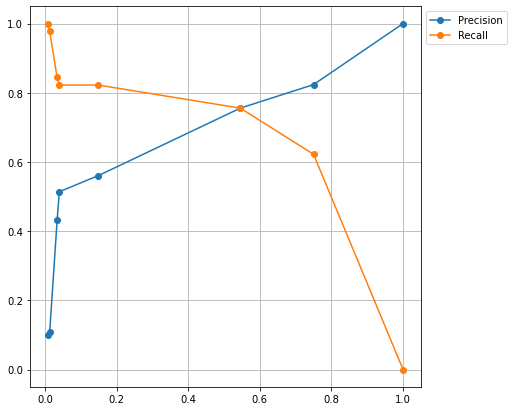

In [48]:
# precision_recall_curve의 결과를 선그래프로 확인
# x축 : threshold, y축 : recall / precision
plt.figure(figsize=(7, 7))
plt.plot(thresholds, precisions, marker='o', label="Precision")
plt.plot(thresholds, recalls, marker='o', label = "Recall")

plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### Binarizer - 임계값 변경
- Transformer로 양성 여부를 선택하는 임계값을 변경할 수 있다.

In [49]:
prob_test[:,1]

array([0.00826446, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.04      , 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.75      , 0.03389831,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.14925373,
       0.54545455, 0.01304348, 0.01304348, 0.14925373, 0.01304348,
       0.00826446, 0.01304348, 0.03389831, 0.01304348, 0.01304348,
       0.01304348, 0.04      , 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.01304348, 0.01304348, 0.01304348,
       0.01304348, 0.01304348, 0.75      , 0.01304348, 0.00826446,
       0.75      , 0.01304348, 0.14925373, 0.01304348, 0.75      ,
       0.01304348, 0.01304348, 0.01304348, 0.03389831, 0.01304348,
       0.01304348, 0.01304348, 0.75      , 0.14925373, 0.01304348,
       0.00826446, 0.01304348, 0.01304348, 0.54545455, 0.01304348,
       0.01304348, 0.01304348, 0.00826446, 0.01304348, 0.75      ,
       0.01304348, 0.03389831, 0.75      , 0.01304348, 0.01304

In [50]:
# np.where를 이용
threshold = 0.1
r = np.where(prob_test[:,1]>=threshold, 1, 0)
np.unique(r, return_counts=True)

(array([0, 1]), array([384,  66], dtype=int64))

In [51]:
recall_score(y_test, r), precision_score(y_test, r)

(0.8222222222222222, 0.5606060606060606)

In [52]:
# Binarizer - 숫자를 0,1 두개(Binary)로 변환하는 Transformer
from sklearn.preprocessing import Binarizer

exam = [[0.3, 0.4, 0.5, 0.6, 0.7]]
threshold = 0.5
threshold = 0.3
threshold = 0.6
b = Binarizer(threshold=threshold)    # threshold이하면 0으로 초과면 1로 변환
b.fit_transform(exam)

array([[0., 0., 0., 0., 1.]])

In [53]:
binarizer1 = Binarizer(threshold=0.5)
binarizer2 = Binarizer(threshold=0.1)
binarizer3 = Binarizer(threshold=0.7)
pred_test_0_5 = binarizer1.fit_transform(prob_test)[:, 1]
pred_test_0_1 = binarizer2.fit_transform(prob_test)[:, 1]
pred_test_0_7 = binarizer3.fit_transform(prob_test)[:, 1]

In [54]:
binarizer1.fit_transform(prob_test)[:, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [55]:
prob_test

array([[0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.96      , 0.04      ],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.25      , 0.75      ],
       [0.96610169, 0.03389831],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.85074627, 0.14925373],
       [0.45454545, 0.54545455],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.85074627, 0.14925373],
       [0.98695652, 0.01304348],
       [0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.96610169, 0.03389831],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.

In [56]:
print("Threshold = 0.5")
print(recall_score(y_test, pred_test_0_5), precision_score(y_test, pred_test_0_5))
print("Threshold = 0.1")  # recall 올라감, precision 내려감 => 실제 Positive를 더 많이 맞췄다.
print(recall_score(y_test, pred_test_0_1), precision_score(y_test, pred_test_0_1))
print("Threshold = 0.7")  # precision이 올라감 => Positive 예측한 것이 더 많이 맞았지.
print(recall_score(y_test, pred_test_0_7), precision_score(y_test, pred_test_0_7))

Threshold = 0.5
0.7555555555555555 0.7555555555555555
Threshold = 0.1
0.8222222222222222 0.5606060606060606
Threshold = 0.7
0.6222222222222222 0.8235294117647058


## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 0 → 1 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
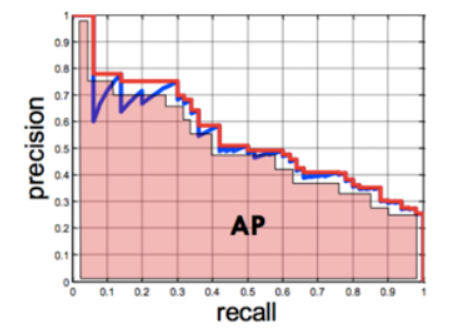   

recall 관점에서 성능 지표를 확인.
threshold를 변경해서 Recall 점수를 올렸을때 precision이 언제/얼마나 떨어지는지 지표화 한것.
- precision_recall_curve() : threshold별 recall/precision 점수 반환 함수
- plot_precision_recall_curve() : PR curve를 그려주는 함수.
- average_precision_score() : AP score 계산 함수

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

# 학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 추론(확률)
proba_test_tree = tree.predict_proba(X_test)[:, 1] # 양성
proba_test_rf = rf.predict_proba(X_test)[:,1 ]

In [59]:
# 평가지표 - precision_recall_curve(p, r, th)
precision1, recall1, threshold1 = precision_recall_curve(y_test, proba_test_tree) # (y정답, 양성확률)
precision2, recall2, threshold2 = precision_recall_curve(y_test, proba_test_rf)
precision1.shape, recall1.shape, threshold1.shape, precision2.shape, recall2.shape, threshold2.shape

((8,), (8,), (7,), (198,), (198,), (197,))

In [60]:
# 표로 확인(DataFrame)
import pandas as pd
print('Tree 결과')
df_rf = pd.DataFrame({
        "Threshold" : np.append(threshold1, 1),
        "Precision" : precision1,
        "Recall" : recall1
})

Tree 결과


In [61]:
import pandas as pd
print('RandomForest 결과')
df_rf = pd.DataFrame({
        "Threshold" : np.append(threshold2, 1),
        "Precision" : precision2,
        "Recall" : recall2
})

RandomForest 결과


In [62]:
df_rf

,Threshold,Precision,Recall
0,0.080666,0.228426,1.000000
1,0.081213,0.224490,0.977778
2,0.083313,0.225641,0.977778
3,0.083402,0.226804,0.977778
4,0.083429,0.227979,0.977778
...,...,...,...
193,0.418662,1.000000,0.088889
194,0.429407,1.000000,0.066667
195,0.430382,1.000000,0.044444
196,0.456759,1.000000,0.022222


C:\Users\Playdata\anaconda3\envs\jcryml\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Playdata\anaconda3\envs\jcryml\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0, flags=flags)


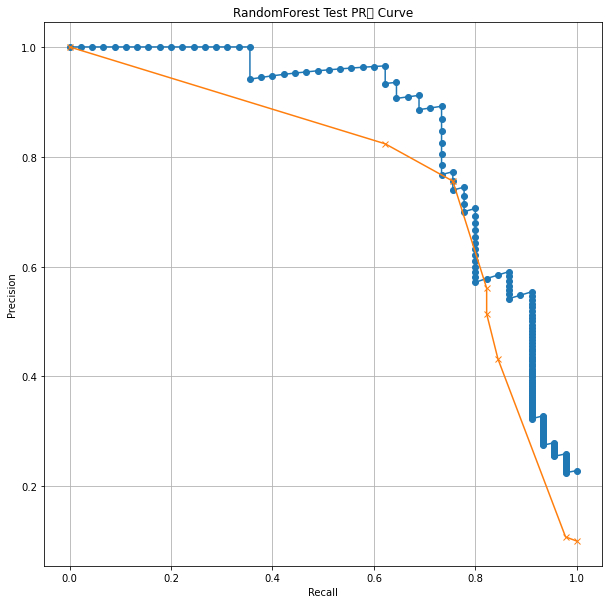

In [63]:
# Precision Recall Curve -  직접 그리기.
plt.figure(figsize=(10,10))
plt.plot(recall2, precision2, marker='o')  # X :  recall, y : precision
plt.plot(recall1, precision1, marker='x', label='Tree')
plt.title("RandomForest Test PR의 Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

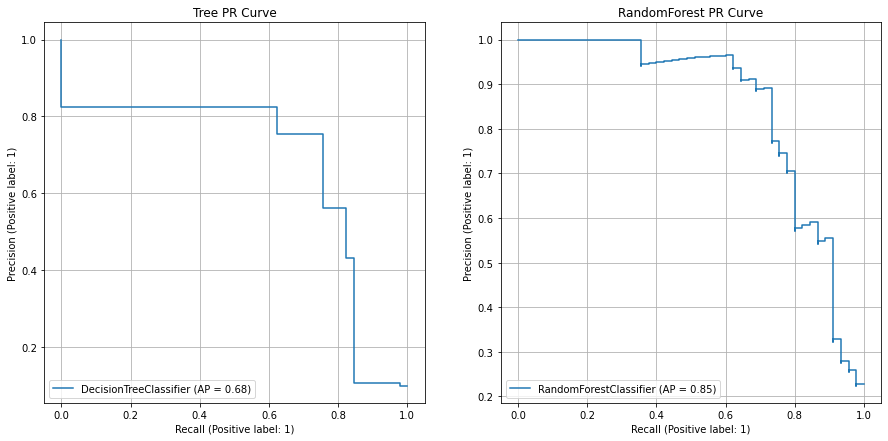

In [64]:
# plot_precision_recall_curve()
fig, ax = plt.subplots(1,2, figsize=(15,7))
plot_precision_recall_curve(tree, # 모델
                           X_test, # X
                            y_test, # y
                            ax=ax[0]
                           )
ax[0].set_title('Tree PR Curve')
ax[0].grid(True)

plot_precision_recall_curve(rf, X_test, y_test, ax=ax[1])
ax[1].set_title('RandomForest PR Curve')
ax[1].grid(True)

plt.show()

In [65]:
# AP Score 조회
print("Decision Tree AP Score", average_precision_score(y_test, proba_test_tree)) # (y정답, 양성일확률)
print("RandomForest AP Score", average_precision_score(y_test, proba_test_rf))


Decision Tree AP Score 0.6766948888666132
RandomForest AP Score 0.8486345312919419


## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

y 축 : recall
x축 : 위양성률(1 - (특이도 : 실제neg중에서 neg로 잘 예측한거)) 

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

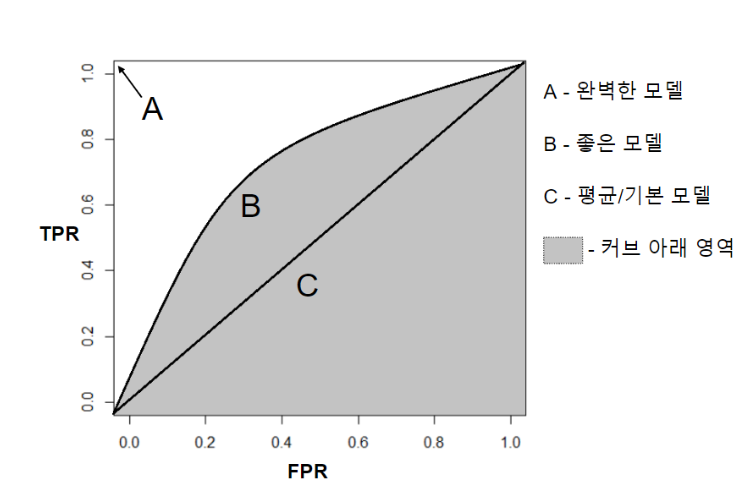

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환

## ROC Curve - PR Curve
- ROC: 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- PR curve(Precision Recall 커브): 양성 클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [66]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

In [67]:
# roc_curve(y값, 양성확률): FPRs(fall out-위양성율), TPRs(recall), Thresholds
fprs1, tprs1, thresholds1 = roc_curve(y_test, proba_test_tree)  # tree 예측결과
fprs2, tprs2, thresholds2 = roc_curve(y_test, proba_test_rf)  # random forest 예측결과
fprs1.shape, tprs1.shape, thresholds1.shape, fprs2.shape, tprs2.shape, thresholds2.shape

((8,), (8,), (8,), (30,), (30,), (30,))

In [68]:
# DataFrame 확인
pd.DataFrame({
    "TH":thresholds1,
    "FPR":fprs1,
    "TPR":tprs1
})

,TH,FPR,TPR
0,1.750000,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


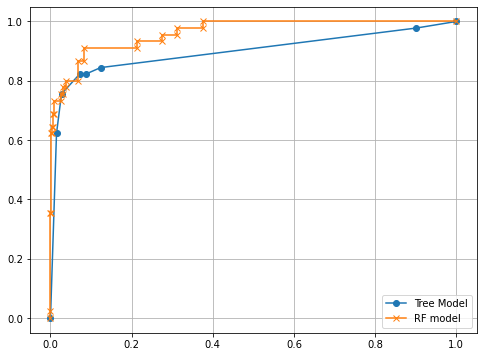

In [69]:
# ROC curve 직접 작성
plt.figure(figsize=(8,6))
plt.plot(fprs1, tprs1, marker='o', label='Tree Model') #X: FPR, Y: TPR
plt.plot(fprs2, tprs2, marker='x', label='RF model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# TODO
- breast_cancer data 모델링
1. breast_cancer data 로딩
2. Train/Test set으로 분리
3. 모델링 - DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200) : 하이퍼파라미터는 위와 동일
4. 평가 (Train/Test set)
    - 평가지표
        - accuracy_score, recall, precision, f1점수, confusion matrix: (정답, 예측분류)
        - PR curve 그리고 AP 점수 확인 : (정답, 양성확률)
        - ROC curve 그리고 AUC 점수 확인

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import plot_roc_curve, roc_auc_score

In [71]:
# dataset loading
X, y = load_breast_cancer(return_X_y=True)
# train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [72]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=0)

# Training(모델 학습)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [73]:
# 추론 + 평가
# Tree 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)
# Tree 양성(Positive) 확률
proba_train_tree = tree.predict_proba(X_train)[:, 1]
proba_test_tree = tree.predict_proba(X_test)[:, 1]

# random forest 추론
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)
proba_train_rf = rf.predict_proba(X_train)[:, 1]
proba_test_rf = rf.predict_proba(X_test)[:, 1]

In [74]:
def print_metrics(y, pred, title=None):
    """
    평가결과(정확도, 재현율, 정밀도, F1점수, 혼동행렬) 를 출력하는 함수
    [parameter]
        y: 정답 y
        pred: 모델이 예측한 값
        title: 어떤 모델에 대한 평가결과인지 제목
    """
    if title:
        print(title)
    acc = accuracy_score(y, pred)
    recall = recall_score(y, pred)
    precision = precision_score(y, pred)
    f1 = f1_score(y, pred)
    cm = confusion_matrix(y, pred)
    print("정확도: {}, 재현율: {}, 정밀도: {}, F1 점수: {}".format(acc, recall, precision, f1))
    print(cm)

In [75]:
print_metrics(y_train, pred_train_tree, title="DecisionTree Train 평가지표")

DecisionTree Train 평가지표
정확도: 0.9736263736263736, 재현율: 0.9964912280701754, 정밀도: 0.9627118644067797, F1 점수: 0.9793103448275863
[[159  11]
 [  1 284]]


In [76]:
print_metrics(y_test, pred_test_tree, title="DecisionTree Test 평가지표")

DecisionTree Test 평가지표
정확도: 0.9210526315789473, 재현율: 0.9305555555555556, 정밀도: 0.9436619718309859, F1 점수: 0.9370629370629372
[[38  4]
 [ 5 67]]


In [77]:
print_metrics(y_train, pred_train_rf, title="Random Forest Train 평가지표")

Random Forest Train 평가지표
정확도: 0.9692307692307692, 재현율: 0.9859649122807017, 정밀도: 0.9656357388316151, F1 점수: 0.9756944444444443
[[160  10]
 [  4 281]]


In [78]:
print_metrics(y_test, pred_test_rf, title='Random Forest Test 평가지표')

Random Forest Test 평가지표
정확도: 0.9385964912280702, 재현율: 0.9444444444444444, 정밀도: 0.9577464788732394, F1 점수: 0.951048951048951
[[39  3]
 [ 4 68]]


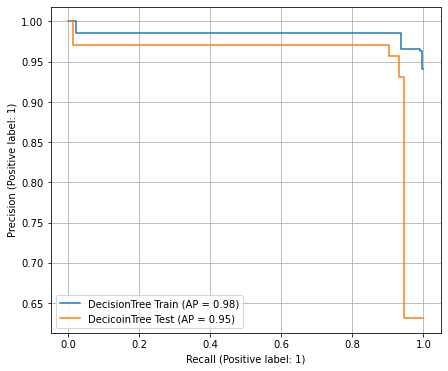

In [79]:
# precision Recall Curve + AP
_, ax = plt.subplots(1,1, figsize=(7,6))
plot_precision_recall_curve(tree, X_train, y_train, ax=ax, name="DecisionTree Train")
plot_precision_recall_curve(tree, X_test, y_test, ax=ax, name="DecicoinTree Test")

plt.grid(True)
plt.show()

In [80]:
average_precision_score(y_train, proba_train_tree), average_precision_score(y_test, proba_test_tree)

(0.9842102478389377, 0.9508563971094506)

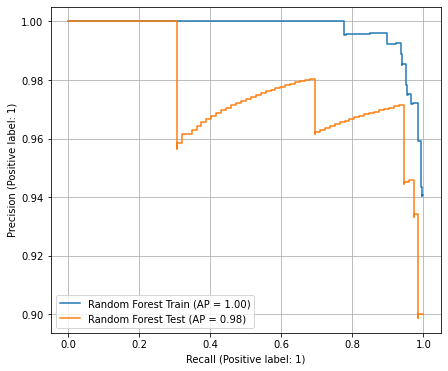

In [81]:
_, ax = plt.subplots(1,1, figsize=(7,6))
plot_precision_recall_curve(rf, X_train, y_train, ax=ax, name='Random Forest Train')
plot_precision_recall_curve(rf, X_test, y_test, ax=ax, name='Random Forest Test')

# plt.yticks(np.arange(0,1.01,0.1))
plt.grid(True)
plt.show()

In [82]:
average_precision_score(y_train, proba_train_rf), average_precision_score(y_test, proba_test_rf)

(0.9973840556546545, 0.977122126791544)

In [83]:
# ROC Curve + roc auc score

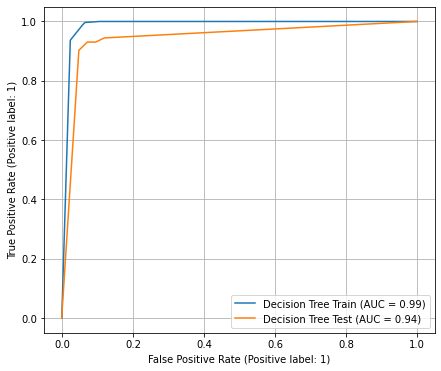

In [84]:
_, ax = plt.subplots(1,1, figsize=(7,6))
plot_roc_curve(tree, X_train, y_train, ax=ax, name='Decision Tree Train')
plot_roc_curve(tree, X_test, y_test, ax=ax, name="Decision Tree Test")

plt.grid(True)
plt.show()

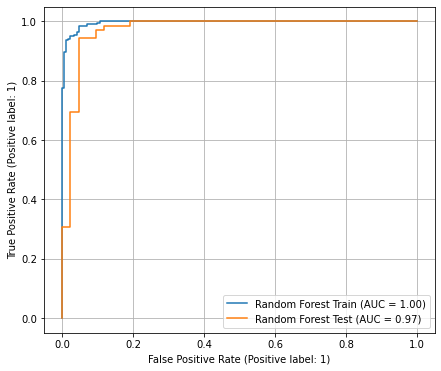

In [85]:
_, ax = plt.subplots(1,1,figsize=(7,6))
plot_roc_curve(rf, X_train, y_train, ax=ax, name='Random Forest Train')
plot_roc_curve(rf, X_test, y_test, ax=ax, name='Random Forest Test')
plt.grid(True)
plt.show()

In [86]:
roc_auc_score(y_train, proba_train_tree), roc_auc_score(y_test, proba_test_tree)

(0.9863261093911249, 0.9446097883597883)

In [87]:
roc_auc_score(y_train, proba_train_rf), roc_auc_score(y_test, proba_test_rf)

(0.9957481940144479, 0.9718915343915344)

In [88]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [89]:
graph = Source(export_graphviz(tree,
                              out_file=None))

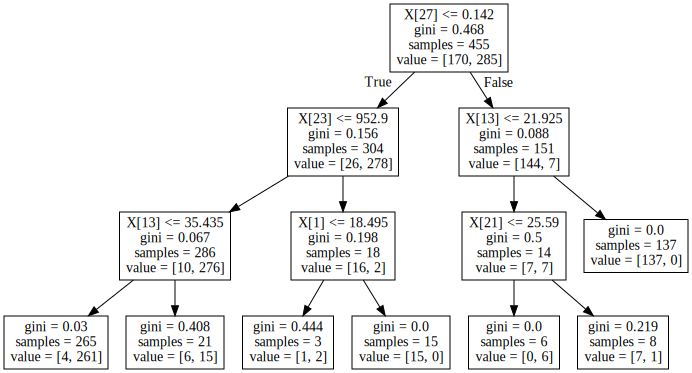

In [90]:
graph